In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.colors import LogNorm
import seaborn as sns
from scipy.optimize import curve_fit
from scipy import stats
import scipy
from scipy.special import erf

Importing the raw data for Am-Be source

In [2]:
data1 = pd.read_csv("DataR_CH3@V1730_221_run100.CSV")
df1 = data1["BOARD;CHANNEL;TIMETAG;ENERGY;ENERGYSHORT;FLAGS"].str.split(";", expand=True)
df1=df1.rename(columns={
    0 : "Board",
    1 : "Channel",
    2 : "TimeTag",
    3 : "Energy",
    4 : "EnergyShort",
    5 : "Flags"
})
df1.loc[380902 ,  "Energy"] = 1
df1.loc[381030 ,  "Energy"] = 1
df1.to_csv("Refined_Data1_run_100.csv")
df1

,Board,Channel,TimeTag,Energy,EnergyShort,Flags
0,0,3,15678565639,127,124,0x4000
1,0,3,30739787654,79,71,0x4000
2,0,3,32743389592,135,126,0x4000
3,0,3,38510501437,77,75,0x4000
4,0,3,59764787451,146,137,0x4000
...,...,...,...,...,...,...
1148680,0,3,12464497242705749,82,74,0x4000
1148681,0,3,12464503146847467,124,117,0x4000
1148682,0,3,12464508413853843,76,74,0x4000
1148683,0,3,12464520857600998,87,80,0x4000


In [3]:
df2 = pd.read_csv("Refined_Data1_run_100.csv")

cloumn = "Energy"
select_column = df2[cloumn]
select_column_energy = select_column.tolist()
# print(type(select_column_energy))

colum2 = "EnergyShort"
select_column2 = df2[colum2]
select_column_short = select_column2.tolist()

cloum3 = "TimeTag"
select_column3 = df2[cloum3]
select_column_timetag = select_column3.tolist()

In [4]:
long_gate = np.array(select_column_energy)
short_gate = np.array(select_column_short)
time_tag_array = np.array(select_column_timetag)

In [5]:
QsbyQl = np.divide(short_gate , long_gate)
psd = 1-QsbyQl
psd_list = psd.tolist()
psd
# for i in range( 0 , len(psd_list)):
#     if psd_list[i] < -50:
#         # print(psd_list[i])
#         print(i)
emptyl_psd = []
empty_long_gate = []
empty_short_gate = []
for i in range(0 , len(psd_list)):
    if (psd[i] <= 2) and (psd_list[i] >= -0.6):
        emptyl_psd.append(psd_list[i])
        empty_long_gate.append(select_column_energy[i])

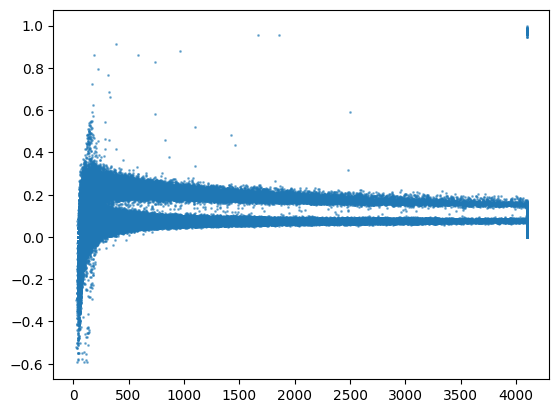

In [6]:
plt.scatter( np.array(empty_long_gate) , np.array(emptyl_psd)  , alpha=0.5, s=1)

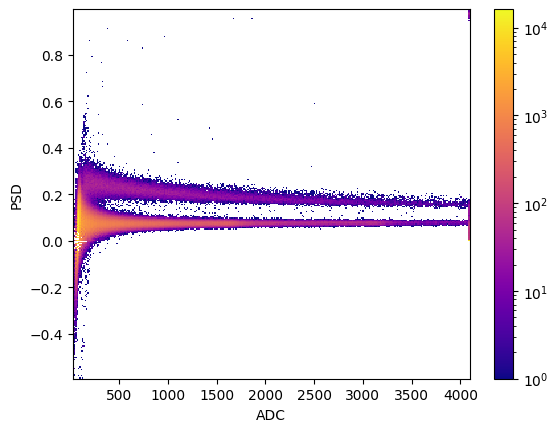

In [7]:
h, xedge, yedge, img = plt.hist2d(np.array(empty_long_gate), np.array(emptyl_psd) , bins=(300,300), cmap='plasma', norm=LogNorm())
# plt.xlabel("ADC Channel")
plt.colorbar()
plt.xlabel("ADC")
plt.ylabel("PSD")
plt.savefig("Heat_plot.png")
plt.show()

In [14]:
np.savetxt("Histogram_data.txt", h, header="Random histogram")

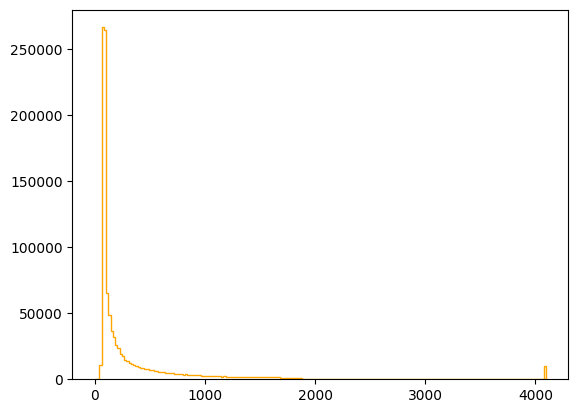

In [8]:
plt.clf()
counts, edges, n_plot = plt.hist(long_gate , bins = 200 ,  histtype='step'  ,  color = 'orange'  )

# plt.clf()
# n_counts
# n_edges
# np.argmax(n_counts)
#print(counts)

# print(edges)


In [9]:
Energy = ( 0.000715842077072048 )*(long_gate) + ( 0.18069086932635492 )

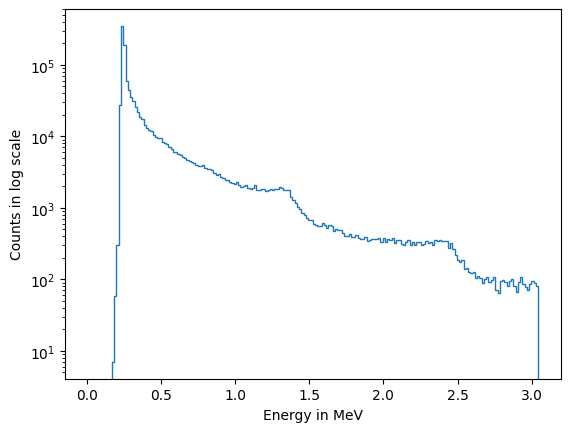

In [10]:
counts, edges, n_plot = plt.hist(Energy , bins = 200 ,  histtype='step' , range=(0 ,( 0.000715842077072048 )*(4000) + ( 0.18069086932635492 )) , log = True  )
plt.xlabel("Energy in MeV")
plt.ylabel("Counts in log scale")
plt.savefig("Neutron Energy Spectrum.png")
plt.show()

In [11]:
 # y = ( 0.000715842077072048 )x + ( 0.18069086932635492 )

In [12]:
np.argmax( counts )

print( edges[7] )

0.10654207121650915


In [13]:
np.argmax(np.array([1,2,3,4,4,3,2,5,4]))

np.int64(7)

In [14]:
n = 0
for i in psd_list:
    if i <= -1:
        n = n + 1
n

225

In [15]:
print((n/1148685)*100)

0.019587615403700753


In [16]:
class MyClass:
    def __init__(self):
        data = {
            "key1": "value1",
            "key2": "value2",
            "key3": "value3"
        }
    def method():
        print("In method function in MyClass")
        return 1,2,3

method, h, c = MyClass.method()
method

In method function in MyClass


1

In [17]:
df3 = pd.read_csv("refined_data1.csv")
df3

,Unnamed: 0,Board,Channel,TimeTag,Energy,EnergyShort,Flags
0,0,0,3,11251207468,89,82,0x4000
1,1,0,3,17286791624,579,532,0x4000
2,2,0,3,38926261139,204,190,0x4000
3,3,0,3,53848533874,69,69,0x4000
4,4,0,3,67694290124,95,86,0x4000
...,...,...,...,...,...,...,...
224119,224119,0,3,2347225537921373,87,87,0x4000
224120,224120,0,3,2347234521593374,373,297,0x4000
224121,224121,0,3,2347247253475060,320,311,0x4000
224122,224122,0,3,2347248843198397,1418,1321,0x4000


In [18]:
cloumn5 = "Energy"
select_column = df3[cloumn5]
select_column_energy5 = select_column.tolist()
# print(type(select_column_energy))

column6 = "EnergyShort"
select_column2 = df3[column6]
select_column_short6 = select_column2.tolist()

cloumn7 = "TimeTag"
select_column3 = df3[cloumn7]
select_column_timetag7 = select_column3.tolist()
len(select_column_energy5)

224124

In [19]:
new_long_gate =  select_column_energy
new_short_gate = select_column_short
for i in range( 0 , len(select_column_energy5)):
    (new_long_gate).append(select_column_energy5[i])
    (new_short_gate).append(select_column_short6[i])

In [20]:
len(new_long_gate)

1372809

In [21]:
new_long_gate = np.array(new_long_gate)
new_short_gate = np.array(new_short_gate)
len(new_short_gate)

1372809

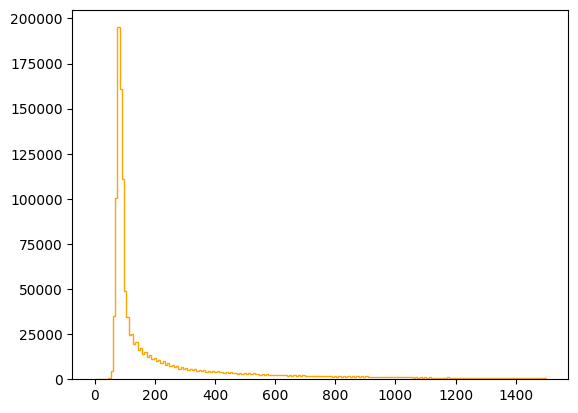

In [22]:
counts2, edges2, n_plot = plt.hist(new_long_gate , bins = 200 ,  histtype='step' , range = ( 0 , 1500) ,  color = 'orange'  )

In [23]:
Energy2 = (0.0007032008642733409)*(new_long_gate) + (0.02537153831758976)

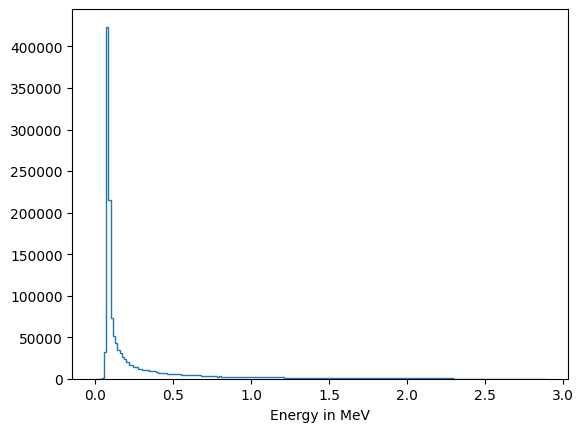

In [24]:
plt.hist(Energy2 , bins = 200 ,  histtype='step' , range = ( 0 , (( 0.000715842077072048 )*(4000) + (0.02537153831758976)) )  )
plt.xlabel("Energy in MeV")
# plt.ylabel("Counts in log scale")
# plt.savefig("Am-Be Energy Spectrum.png")
plt.show()

In [25]:
psd = 1 - (new_short_gate/new_long_gate)
len(psd)
psd

array([0.02362205, 0.10126582, 0.06666667, ..., 0.028125  , 0.06840621,
       0.01298701], shape=(1372809,))

In [26]:
len(new_long_gate)

1372809

In [27]:
len(psd)

1372809

In [28]:
emptyl_psd = []
empty_long_gate = []
empty_short_gate = []
for i in range(0 , len(psd)):
    if (psd[i] <= 1) and (psd[i] >= -1):
        emptyl_psd.append(psd[i])
        empty_long_gate.append(new_long_gate[i])
empty_long_gate2 = ((0.0007032008642733409))*np.array((empty_long_gate)) + (0.02537153831758976)
len(empty_long_gate2)

1372585

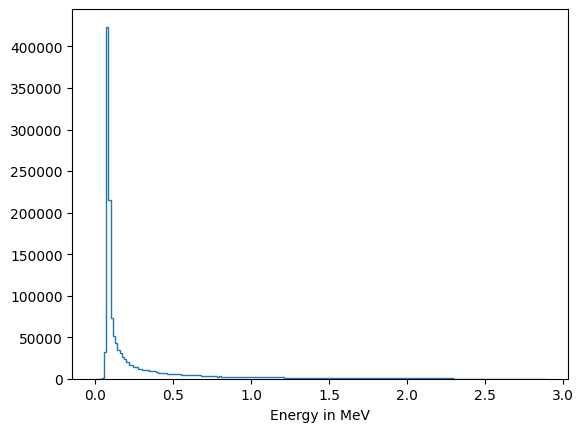

In [29]:
plt.hist(empty_long_gate2 , bins = 200 ,  histtype='step' , range = ( 0 , (( 0.000715842077072048 )*(4000) + (0.02537153831758976)) ) )
plt.xlabel("Energy in MeV")
# plt.ylabel("Counts in log scale")
# plt.savefig("Am-Be Energy Spectrum.png")
plt.show()

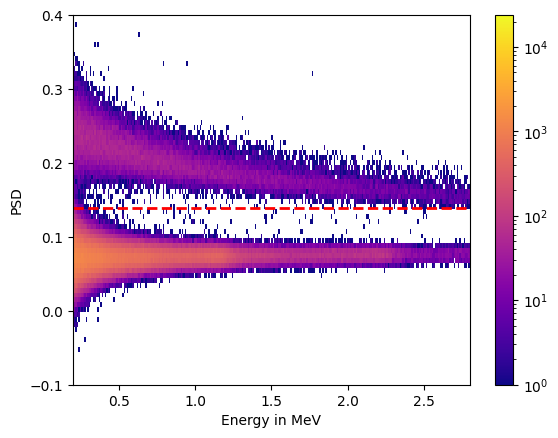

In [77]:
h, xedge, yedge, img = plt.hist2d(empty_long_gate2, emptyl_psd , bins=(300,300), cmap='plasma', norm=LogNorm())
# plt.xlabel("ADC Channel")
# plt.ylim( - 0.6 , 1 )
plt.colorbar()
plt.ylim(-0.1 , 0.4)
plt.xlim(0.2 , 2.8)
plt.axhline(y=0.139, color='red', linestyle='--', linewidth=2)
# plt.axvline(x=0.39, color='red', linestyle='--', linewidth=2)
plt.xlabel("Energy in MeV")
plt.ylabel("PSD")
plt.savefig("Heat_plot of psd of Am-Be2.png") 
plt.show()

In [31]:
# h1, xedge1, yedge1, img1 = plt.hist2d(empty_long_gate, emptyl_psd , bins=(300,300), cmap='plasma', norm=LogNorm())
# # plt.xlabel("ADC Channel")
# # plt.ylim( - 0.6 , 1 )
# plt.colorbar()
# plt.xlabel("ADC")
# plt.ylabel("PSD")
# plt.show()

In [32]:
n_energy1 = ([])
n_psd1 = ([])
for i in range ( 0 , len(emptyl_psd)):
    if (emptyl_psd[i] >= 0.136 ) and ( empty_long_gate2[i] >= 0.39):
        (n_energy1).append(empty_long_gate2[i])
        (n_psd1).append(emptyl_psd[i]) 
n_energy1 = np.array(n_energy1)
n_psd1 = np.array(n_psd1)

In [33]:
len(n_energy1)

31322

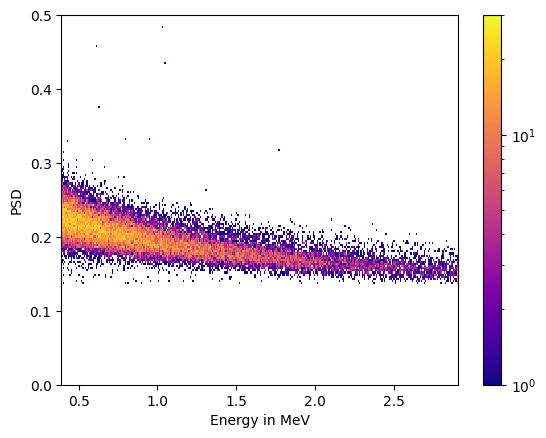

In [34]:
h, xedge, yedge, img = plt.hist2d( n_energy1, n_psd1 , bins=(300,300), cmap='plasma', norm=LogNorm())
plt.colorbar()
plt.ylim(0 , 0.5)
plt.xlabel("Energy in MeV")
plt.ylabel("PSD")
plt.savefig("psd vs energy of neutron for Am-Be.png")

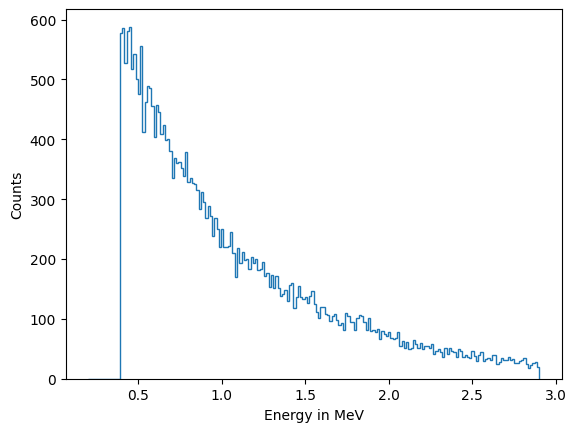

In [35]:
plt.hist( n_energy1 , bins = 200 ,  histtype='step' , range = ( 0.2 , 2.9) )
plt.xlabel("Energy in MeV")
plt.ylabel("Counts")
# plt.show()
plt.savefig("Energy spectrum of Neutron of Am-Be.png")

In [36]:
g_energy1 = ([])
g_psd1 = ([])
for i in range ( 0 , len(emptyl_psd)):
    if (emptyl_psd[i] < 0.136 ) and ( empty_long_gate2[i] >= 0.39):
        (g_energy1).append(empty_long_gate2[i])
        (g_psd1).append(emptyl_psd[i]) 
g_energy1 = np.array(g_energy1)
g_psd1 = np.array(g_psd1)

In [37]:
len(g_energy1)

221630

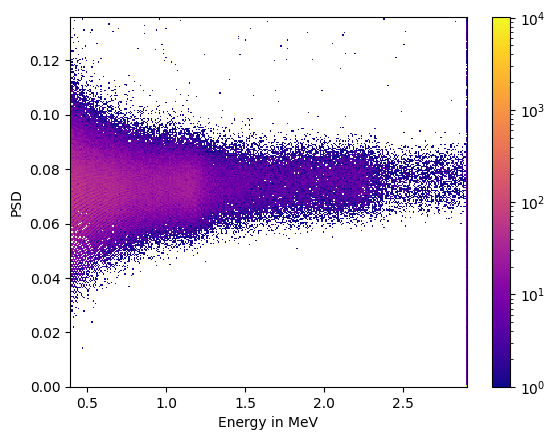

In [38]:
plt.hist2d(g_energy1 , g_psd1 ,  bins=(300,300), cmap='plasma', norm=LogNorm())
plt.colorbar()
plt.xlabel("Energy in MeV")
plt.ylabel("PSD")
plt.savefig("psd vs energy of gamma for Am-Be.png")
plt.show()

In [39]:
g_adc = (g_energy1 - 0.02537153831758976)/(0.0007032008642733409)

Text(0, 0.5, 'PSD')

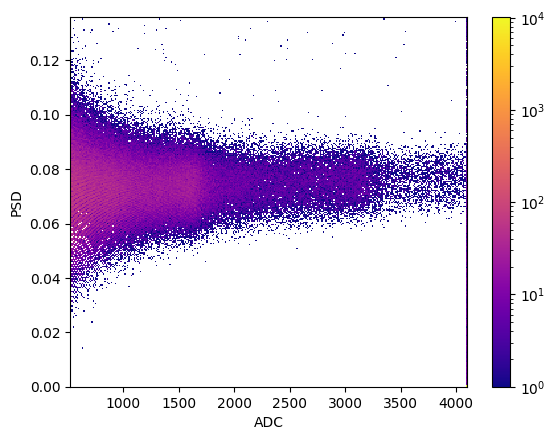

In [40]:
plt.hist2d(g_adc , g_psd1 ,  bins=(300,300), cmap='plasma', norm=LogNorm())
plt.colorbar()
plt.xlabel("ADC")
plt.ylabel("PSD")

Text(0, 0.5, 'Counts')

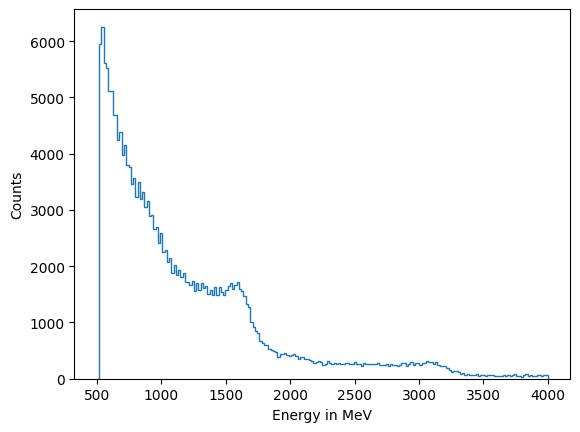

In [41]:
gcounts2, gedges2, gplot = plt.hist( g_adc , bins = 200 ,  histtype='step' , range = (500 , 4000))
plt.xlabel("Energy in MeV")
plt.ylabel("Counts")
# plt.savefig("Energy spectrum of Gamma of Am-Be.png")

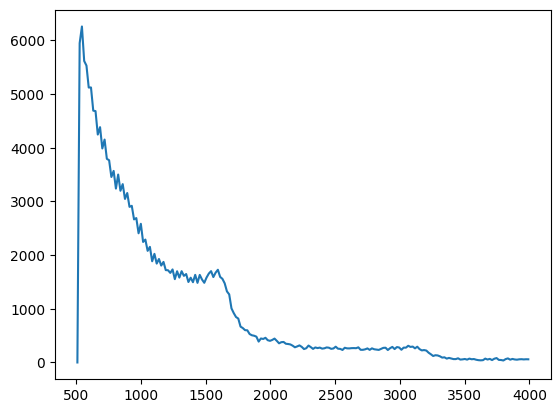

In [42]:
gpoints = ((gedges2[1:] + gedges2[:-1])/2)
plt.plot(gpoints , gcounts2)

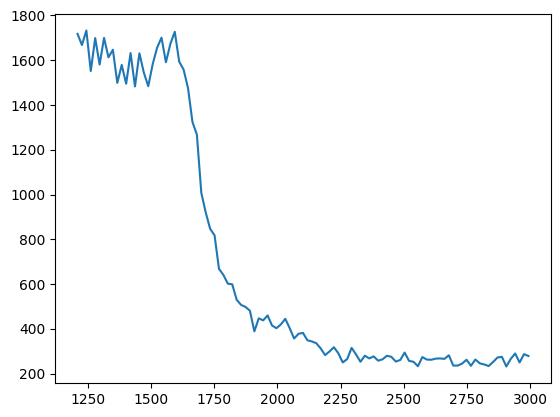

In [43]:
empty_x = []
empty_y = []
for i in range( 0 , len(gpoints)):
    if (gpoints[i] > 1200) and (gpoints[i] < 3000):
        empty_x.append(gpoints[i])
        empty_y.append(gcounts2[i])
plt.plot(empty_x , empty_y)

In [44]:
def erf_model2(x, a, c, d,sigma):
    return (a * (1-erf((x + c)/(np.sqrt(2)*sigma))) + d)

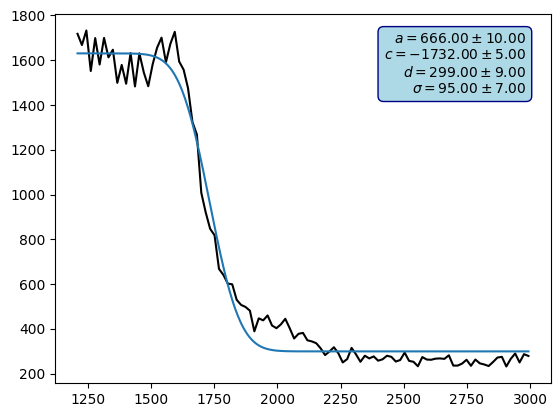

In [45]:
m , dm = scipy.optimize.curve_fit(erf_model2 , empty_x , empty_y, p0=[1200,-1800,200,20]  )
plt.plot(empty_x , empty_y, color = 'black' )
# [400 , -1600 , -549 , 100] , [550 , -1200 , -395 , 500]
x_fit = np.linspace(min(empty_x), max(empty_x), 500)
param_text = (
    fr'$a = {666:.2f} \pm {10:.2f}$' + '\n' +
    fr'$c = {-1732:.2f} \pm {5:.2f}$' + '\n' +
    fr'$d = {299:.2f} \pm {9:.2f}$' + '\n' +
    fr'$\sigma = {95:.2f} \pm {7:.2f}$'
)

plt.text(0.95, 0.95, param_text, transform=plt.gca().transAxes,
         fontsize=10, verticalalignment='top', horizontalalignment='right',
         bbox=dict(boxstyle='round,pad=0.4', facecolor='lightblue', edgecolor='navy'))
plt.plot( x_fit , erf_model2(x_fit, *m) )

In [46]:
m

array([  665.66386104, -1731.89999897,   299.40043589,    94.68897026])

In [47]:
np.sqrt(np.diag(dm))

array([9.71266555, 4.85215642, 9.36788712, 6.59380966])

In [48]:
(0.0007032008642733409)*(1731.89999897) + (0.02537153831758976)

1.243245114428292

In [49]:
((2.46) + ((2.46**2)+4*(2)*(0.628))**(0.5))/(2*2)

1.4470006009613214

Text(0, 0.5, 'PSD')

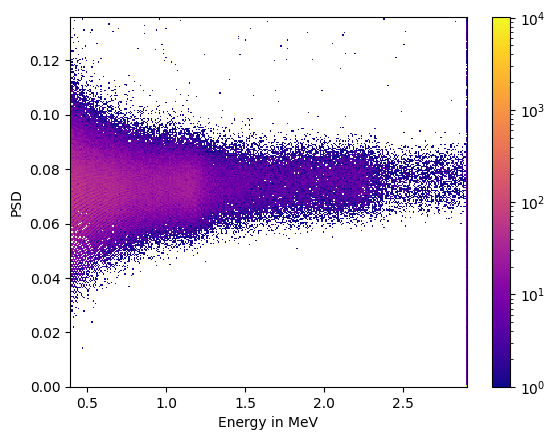

In [50]:
plt.hist2d(g_energy1 , g_psd1 ,  bins=(300,300), cmap='plasma', norm=LogNorm())
plt.colorbar()
plt.xlabel("Energy in MeV")
plt.ylabel("PSD")


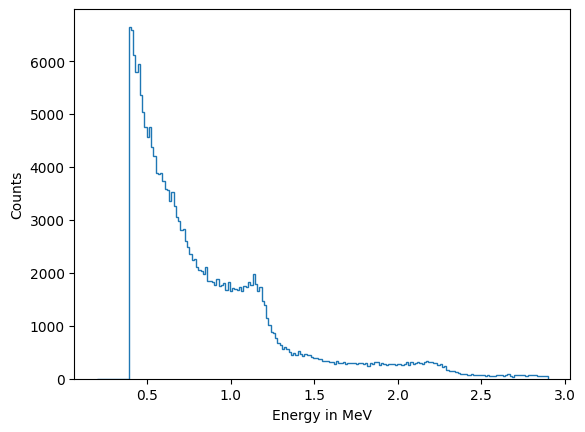

In [51]:
gcounts3 , gedges3 , gplot3 = plt.hist( g_energy1 , bins = 200 ,  histtype='step' , range = ( 0.2 , 2.9) )
plt.xlabel("Energy in MeV")
plt.ylabel("Counts")
plt.savefig("Energy spectrum of Gamma of Am-Be.png")

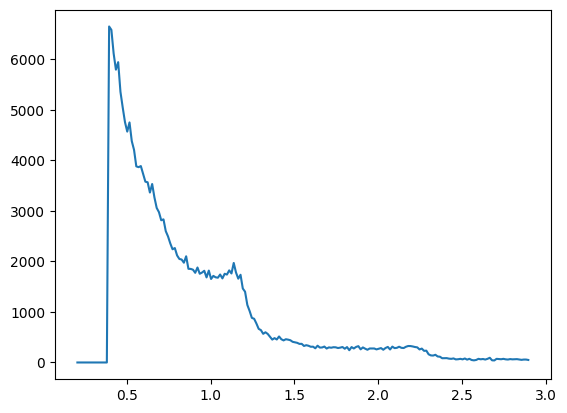

In [52]:
gpoints2 = ((gedges3[1:] + gedges3[:-1])/2)
plt.plot( gpoints2 , gcounts3)

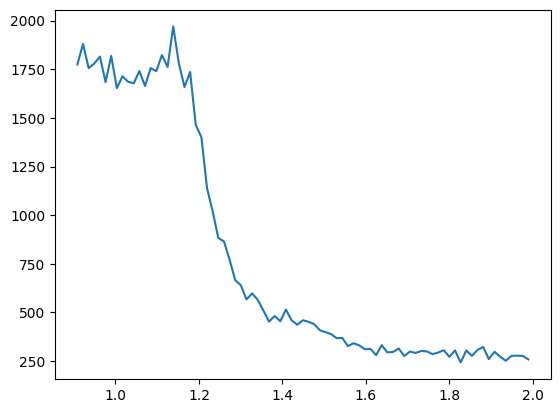

In [53]:
empty_x2 = []
empty_y2 = []
for i in range (0, len(gpoints2)):
    if (gpoints2[i] > 0.9) and (gpoints2[i] < 2.0):
        empty_x2.append(gpoints2[i])
        empty_y2.append(gcounts3[i])
empty_x2 = np.array(empty_x2)
empty_y2 = np.array(empty_y2)
plt.plot(empty_x2 , empty_y2)

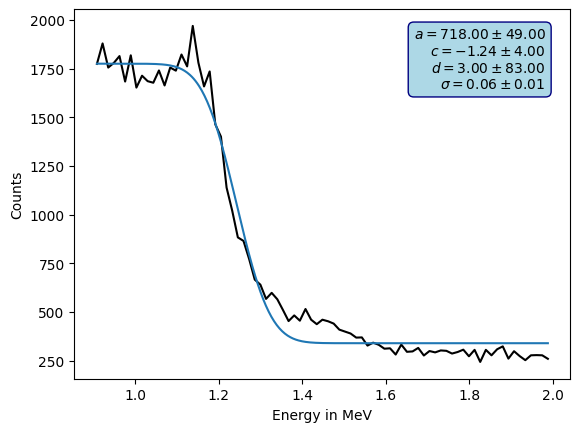

In [54]:
m1 , dm1 = scipy.optimize.curve_fit(erf_model2 , empty_x2 , empty_y2  )
plt.plot(empty_x2 , empty_y2, color = 'black' )
# [400 , -1600 , -549 , 100] , [550 , -1200 , -395 , 500]
x_fit = np.linspace(min(empty_x2), max(empty_x2), 500)
plt.plot( x_fit , erf_model2(x_fit, *m1))
plt.xlabel("Energy in MeV")
plt.ylabel("Counts")
# plt.legend()
param_text = (
    fr'$a = {718:.2f} \pm {49:.2f}$' + '\n' +
    fr'$c = {-1.243:.2f} \pm {4:.2f}$' + '\n' +
    fr'$d = {3:.2f} \pm {83:.2f}$' + '\n' +
    fr'$\sigma = {0.064:.2f} \pm {0.005:.2f}$'
)

plt.text(0.95, 0.95, param_text, transform=plt.gca().transAxes,
         fontsize=10, verticalalignment='top', horizontalalignment='right',
         bbox=dict(boxstyle='round,pad=0.4', facecolor='lightblue', edgecolor='navy'))
plt.savefig("Fitted curve for Am-Be edge.png")

In [55]:
2*((4.44)**2)/(0.511 + 2*(4.44))

4.19840272601427

In [56]:
m1

array([ 7.18381837e+02, -1.24291100e+00,  3.39183771e+02,  6.37375245e-02])

In [57]:
np.sqrt(np.diag(dm1))

array([1.22704335e+01, 3.67682933e-03, 1.21457669e+01, 4.98617343e-03])

In [58]:
(2.48 + ((2.48**2) + 4*(2)*(0.634))**0.5)/4

1.4574962686484043

Text(0, 0.5, 'Normalized Counts')

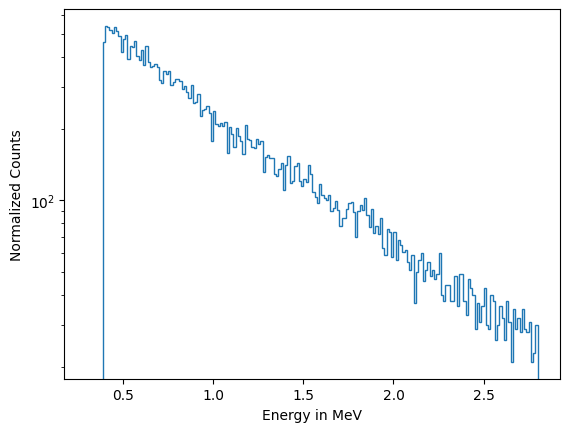

In [59]:
plt.hist( n_energy1 , bins = 200 ,  histtype='step' , range = ( 0.3 , 2.8) , log = True )
plt.xlabel("Energy in MeV")
plt.ylabel("Normalized Counts")
# plt.show()
# plt.savefig("Energy spectrum of Neutron of Am-Be in log.png")